# installation

R environment: http://gphost03.bcgsc.ca:8787/, version:R version 3.5.1 (2018-07-02), latest version is 3.6.1

installation:  https://bioinformatics.mdanderson.org/public-software/estimate/

library(utils) 

rforge <- "http://r-forge.r-project.org"

install.packages("estimate", repos=rforge, dependencies=TRUE)

            

documentation: http://gphost03.bcgsc.ca:8787/help/library/estimate/doc/ESTIMATE_Vignette.pdf

# pog500 expression data:

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
f = '/projects/epleasance/pog/manuscripts/POG500/expression/matrices/POG500_RPKM_expression_matrix_ensembl_stranded.txt'
df = pd.read_csv(f, sep='\t')

In [3]:
df.shape
df.head(2)

(58450, 571)

,genes,POG001,POG002,POG003,POG005,POG006,POG007,POG008,POG009,POG010,...,POG926,POG927,POG928,POG929,POG931,POG934,POG935,POG936,POG941,POG949
0,SCYL3_ENSG00000000457,3.019,3.7006,1.7969,3.5631,2.3156,3.9831,4.7653,2.5009,9.0325,...,2.6724,3.1515,2.2956,5.5489,4.8464,5.0006,4.3140,4.3652,2.5418,3.6930
1,C1orf112_ENSG00000000460,3.005,1.8481,1.1980,1.6090,0.7650,2.8845,2.0870,2.0898,3.2537,...,2.4179,1.4293,0.7826,2.1347,1.8530,0.7206,2.0618,2.4101,1.7582,1.1682


In [4]:
df.shape


(58450, 571)

In [12]:
df['gene'] = df.genes.str.split('_').str[0]

In [13]:
df.drop('genes', axis=1, inplace=True)

In [7]:
df.duplicated() # mark rows as duplicated if the values are all the same.

0        False
1        False
2        False
3        False
4        False
         ...  
58445    False
58446    False
58447    False
58448    False
58449    False
Length: 58450, dtype: bool

In [14]:
df = df.set_index('gene')

In [16]:
# df = df.drop_duplicates(keep='first')
df.shape

(58450, 570)

df.drop_duplicates and df.index.drop_duplicates are different. the former drop duplicated rows, the latter drop duplicated index.

In [15]:
# this does not really work since all the index are still there, it will pulled out all duplicated indices
df.loc[df.index.drop_duplicates(keep='first'), :] 

,POG001,POG002,POG003,POG005,POG006,POG007,POG008,POG009,POG010,POG011,...,POG926,POG927,POG928,POG929,POG931,POG934,POG935,POG936,POG941,POG949
gene,,,,,,,,,,,,,,,,,,,,,
SCYL3,3.0190,3.7006,1.7969,3.5631,2.3156,3.9831,4.7653,2.5009,9.0325,5.5682,...,2.6724,3.1515,2.2956,5.5489,4.8464,5.0006,4.3140,4.3652,2.5418,3.6930
C1orf112,3.0050,1.8481,1.1980,1.6090,0.7650,2.8845,2.0870,2.0898,3.2537,3.1610,...,2.4179,1.4293,0.7826,2.1347,1.8530,0.7206,2.0618,2.4101,1.7582,1.1682
FGR,3.2901,1.4201,7.3673,2.4938,332.8439,6.7598,3.7216,4.8056,4.6700,3.4975,...,2.1109,70.9428,34.9764,46.3000,0.2042,0.9659,88.9239,2.8082,30.9283,10.2410
CFH,10.8968,33.3022,5.7961,39.1822,0.0009,27.2824,19.9309,20.0604,5.1874,39.8610,...,1.6997,3.2834,14.7678,4.5064,4.3258,21.3387,11.8794,11.7939,36.4796,8.9583
STPG1,0.8268,1.1200,2.2365,2.3839,0.9195,0.4627,0.4823,1.3159,0.8536,1.0240,...,2.0199,2.1522,1.4029,0.9806,2.5623,1.5327,2.3137,1.0208,1.3935,0.6484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC134878.2,0.0000,0.0000,0.1180,0.0000,0.0000,0.0000,0.0000,0.4386,0.0000,0.0000,...,0.0000,0.0412,0.0000,0.0000,0.0000,0.1066,0.0000,0.0000,0.0000,0.0000
AC011293.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AC053516.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [17]:
df = df[~(df.index.duplicated())]

In [18]:
of = '/projects/da_workspace/software/ESTIMATE/expr.rpkm'
df.to_csv(of, sep='\t', index=True)

# assess correlation between cibersort and estimate score

In [30]:
fc = '/projects/etitmuss_prj/etitmuss_prj_results/POG500/cibersort_outputs/POG500_absolute_w_totals_no_filter.txt'
dfc = pd.read_csv(fc, sep='\t', index_col='ID')
dfc.head(2)
dfc.shape

,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,T.cells.CD4.memory.activated,T.cells.follicular.helper,T.cells.regulatory..Tregs.,T.cells.gamma.delta,...,Eosinophils,Neutrophils,P.value,Correlation,RMSE,Absolute.score..sig.score.,TotalBcells,TotalTcells,TotalMyeloid,TotalLymphoid
ID,,,,,,,,,,,,,,,,,,,,,
POG001,0.000000,0.039613,0.014984,0.011528,0.0,0.104348,0.0,0.035167,0.001221,0.0,...,0.0,0.046725,0.040,0.158464,1.044293,0.9887,0.054597,0.151043,0.780243,0.208457
POG002,0.070286,0.000000,0.100244,0.029571,0.0,0.063155,0.0,0.023730,0.012996,0.0,...,0.0,0.014780,0.008,0.301197,0.962415,0.7660,0.170530,0.116456,0.453881,0.312119


(570, 30)

In [29]:
fe = '/projects/da_workspace/software/ESTIMATE/pog500_estimate_score.gct'
dfe = pd.read_csv(fe, sep='\t', skiprows=2, index_col='NAME').drop('Description', axis=1).T
dfe.head()
dfe.shape

NAME,StromalScore,ImmuneScore,ESTIMATEScore
POG001,-275.469709,994.925181,719.455471
POG002,-236.231030,523.460995,287.229964
POG003,-250.306152,1989.954462,1739.648311
POG005,-1887.589609,-316.170873,-2203.760482
POG006,-1702.102041,3059.313277,1357.211236


(570, 3)

In [31]:
dfm = pd.merge(dfc, dfe, left_index=True, right_index=True)
dfm.head(2)

,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,T.cells.CD4.memory.activated,T.cells.follicular.helper,T.cells.regulatory..Tregs.,T.cells.gamma.delta,...,Correlation,RMSE,Absolute.score..sig.score.,TotalBcells,TotalTcells,TotalMyeloid,TotalLymphoid,StromalScore,ImmuneScore,ESTIMATEScore
ID,,,,,,,,,,,,,,,,,,,,,
POG001,0.000000,0.039613,0.014984,0.011528,0.0,0.104348,0.0,0.035167,0.001221,0.0,...,0.158464,1.044293,0.9887,0.054597,0.151043,0.780243,0.208457,-275.469709,994.925181,719.455471
POG002,0.070286,0.000000,0.100244,0.029571,0.0,0.063155,0.0,0.023730,0.012996,0.0,...,0.301197,0.962415,0.7660,0.170530,0.116456,0.453881,0.312119,-236.231030,523.460995,287.229964


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

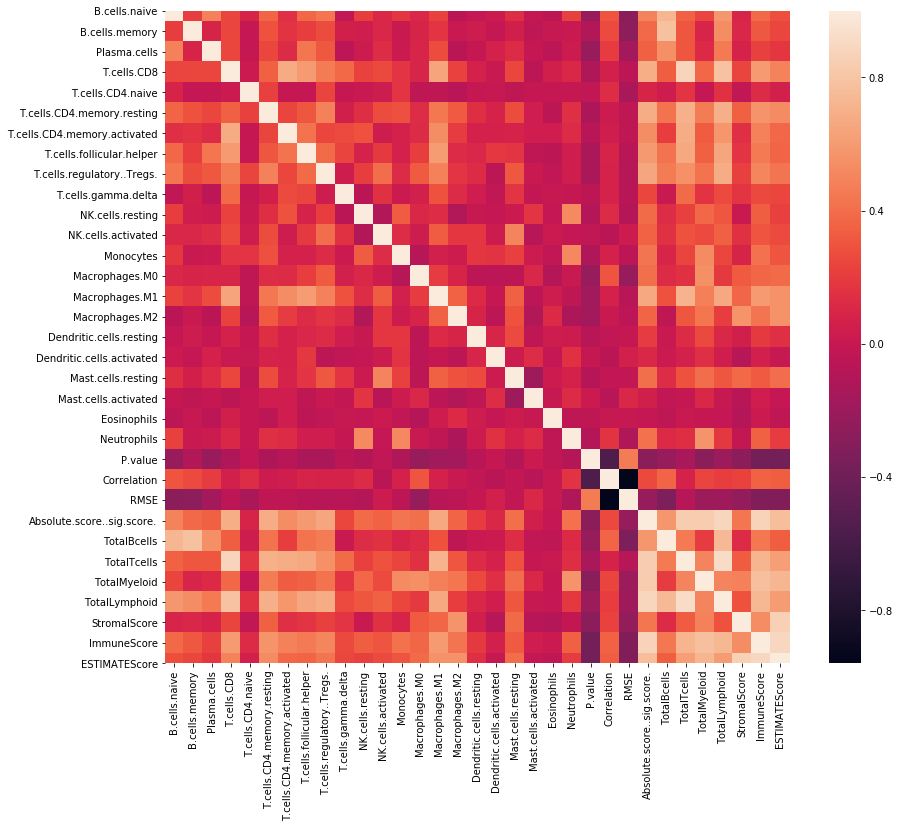

In [66]:
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(dfm.corr())
of = '/projects/da_workspace/software/ESTIMATE/corr_plot.png'
plt.savefig(of, bbox_inches='tight')

In [64]:
dfc = dfm.corr()
dfc.iloc[-3:, -10:]

,Correlation,RMSE,Absolute.score..sig.score.,TotalBcells,TotalTcells,TotalMyeloid,TotalLymphoid,StromalScore,ImmuneScore,ESTIMATEScore
StromalScore,0.232863,-0.233540,0.439530,0.127214,0.327127,0.484842,0.294174,1.000000,0.538295,0.85718
ImmuneScore,0.351067,-0.318316,0.872325,0.443282,0.720126,0.775836,0.739812,0.538295,1.000000,0.89545
ESTIMATEScore,0.337544,-0.317887,0.765256,0.338091,0.612872,0.730226,0.607496,0.857180,0.895450,1.00000
